In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import textstat

from matplotlib import pyplot as plt

textstat.set_lang('de')

In [63]:
DATA_PATH = '/Users/michaelwellner/Workspaces/thesis--text-summarization/data/swisstext'
data = pd.read_csv(DATA_PATH + '/data_train.csv')

data

,source,summary
0,Minghella war der Sohn italienisch-schottische...,"Anthony Minghella, CBE war ein britischer Film..."
1,Ende der 1940er Jahre wurde eine erste Auteur-...,Die Auteur-Theorie ist eine Filmtheorie und di...
2,"Al Pacino, geboren in Manhattan, ist der Sohn ...","Alfredo James ""Al"" Pacino ist ein US-amerikani..."
3,Der Name der Alkalimetalle leitet sich von dem...,Als Alkalimetalle werden die chemischen Elemen...
4,Die Arbeit ist bereits seit dem Altertum Gegen...,Das deutsche Arbeitsrecht ist ein Rechtsgebiet...
...,...,...
99995,Seit dem Grossen Preis von Grossbritannien 195...,Der Grosse Preis von Grossbritannien 1962 fand...
99996,Die Handlung spielt im Herbst 1957. Erster Akt...,Der feurige Elias ist eine österreichische Vo...
99997,Reinhard Moos wurde in Darmstadt als jüngstes...,Reinhard Moos ist ein deutscher und österreic...
99998,Johann Ulrich Freiherr von Cramer entstammte e...,"Johann Ulrich von Cramer, auch ""Kramer"", war e..."


In [59]:
data['stats_source_len'] = data['source'].str.len()
data['stats_summary_len'] = data['summary'].str.len()
data['stats_ratio'] = np.round(data['stats_source_len'] / data['stats_summary_len'], 2)

data['stats_source_fre'] = data.apply(lambda row: textstat.flesch_reading_ease(row['source']), axis = 1)
data['stats_summary_fre'] = data.apply(lambda row: textstat.flesch_reading_ease(row['summary']), axis = 1)

### Text Lengths

<AxesSubplot:>

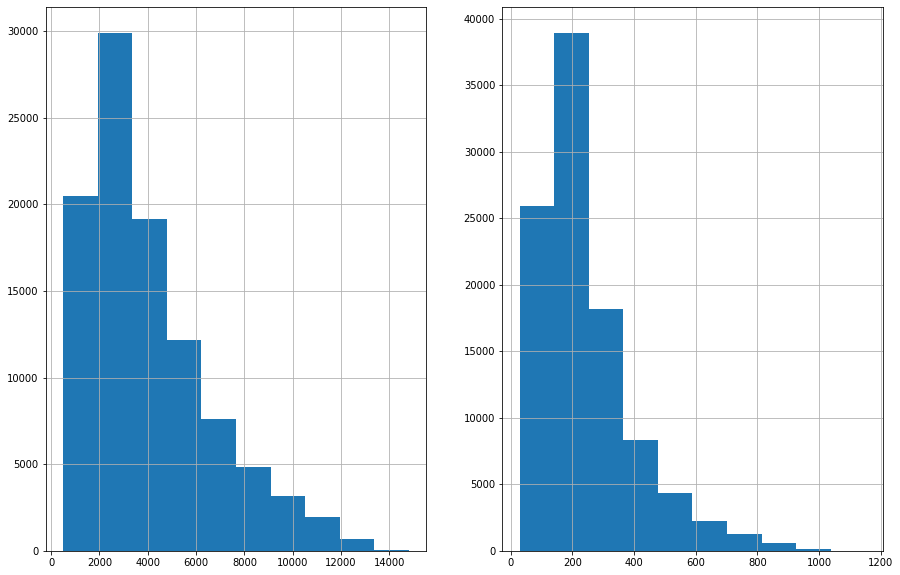

In [51]:
fig, axs = plt.subplots(1,2, figsize=(15,10))
data['stats_source_len'].hist(ax=axs[0])
data['stats_summary_len'].hist(ax=axs[1])

### Source-Summary Ratio

... es gibt einige Ausreiser, welche extrem viel kürzer sind als der eigentliche Text.

count    100000.000000
mean         19.714771
std          13.735979
min           2.730000
25%          10.630000
50%          15.870000
75%          24.520000
max         220.560000
Name: stats_ratio, dtype: float64

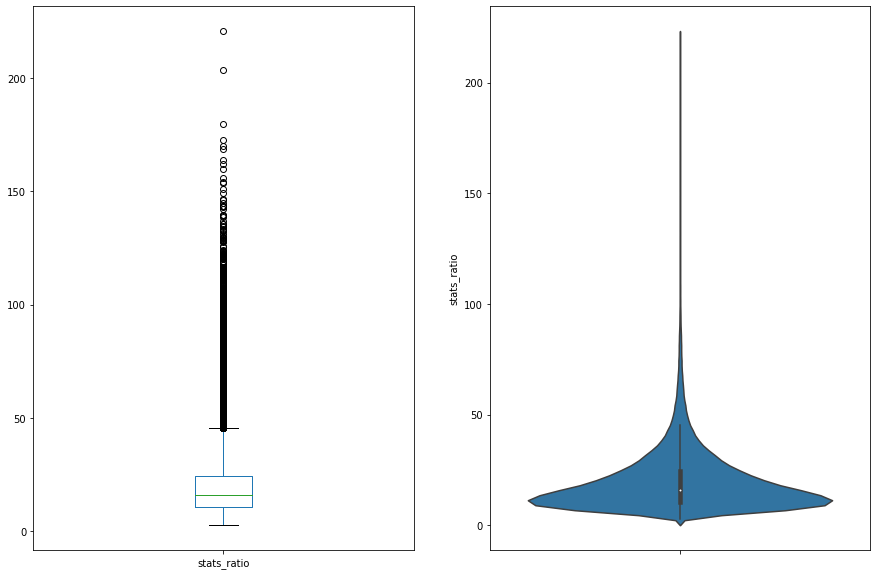

In [52]:
fig, axs = plt.subplots(1,2, figsize=(15,10))
data['stats_ratio'].plot.box(ax=axs[0])
sns.violinplot(y='stats_ratio', data=data, ax=axs[1])
data['stats_ratio'].describe()

## Readbility

Looks like summaries are easier to read. Overall the texts are more difficult to read. Best understood by college students, according to Flesch Reading Ease score.

<AxesSubplot:>

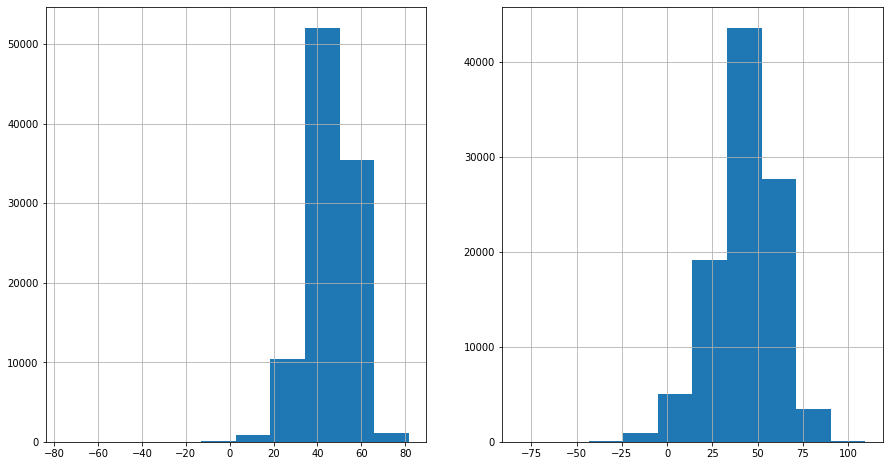

In [62]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
data['stats_source_fre'].hist(ax=axs[0])
data['stats_summary_fre'].hist(ax=axs[1])

## Topic Modelling

In [ ]:
Ration zwischen gleichen Wörten?
Wörtbebuch-Größe

In [69]:
import requests

In [66]:
r = requests.get('https://api.github.com/user', auth=('user', 'pass'))

Object `requests` not found.


In [83]:
r = requests.post(
    'http://localhost:9042/api/data/datasets/sample-project-test/ein-zweites-dataset', 
    files = {
        'file': (
            'Hallo Welt!', 
            open('/Users/michaelwellner/Downloads/some-dataset-1.0.0.avro', 'rb'), 
            'application/avro', 
            { 'Content-Type': 'application/avro' }) 
})

r

<Response [200]>

In [84]:
r.content

b'{\n  "state" : "committed",\n  "id" : "da7a2a0e",\n  "created" : {\n    "by" : "anonymous",\n    "at" : "2020-11-20T12:47:30.799270Z"\n  },\n  "modified" : {\n    "by" : "anonymous",\n    "at" : "2020-11-20T12:47:31.121024Z"\n  },\n  "committed" : {\n    "by" : "anonymous",\n    "at" : "2020-11-20T12:47:31.121029Z"\n  },\n  "records" : 700,\n  "schema" : {\n    "type" : "record",\n    "name" : "Country",\n    "namespace" : "maquette.sdk.samples",\n    "fields" : [ {\n      "name" : "area",\n      "type" : "int"\n    }, {\n      "name" : "capital",\n      "type" : "string"\n    }, {\n      "name" : "name",\n      "type" : "string"\n    }, {\n      "name" : "population",\n      "type" : "int"\n    } ]\n  },\n  "version" : "1.7.0",\n  "message" : "New version with single file upload."\n}'

In [85]:
import json

In [88]:
json.loads(r.content)

{'state': 'committed',
 'id': 'da7a2a0e',
 'created': {'by': 'anonymous', 'at': '2020-11-20T12:47:30.799270Z'},
 'modified': {'by': 'anonymous', 'at': '2020-11-20T12:47:31.121024Z'},
 'committed': {'by': 'anonymous', 'at': '2020-11-20T12:47:31.121029Z'},
 'records': 700,
 'schema': {'type': 'record',
  'name': 'Country',
  'namespace': 'maquette.sdk.samples',
  'fields': [{'name': 'area', 'type': 'int'},
   {'name': 'capital', 'type': 'string'},
   {'name': 'name', 'type': 'string'},
   {'name': 'population', 'type': 'int'}]},
 'version': '1.7.0',
 'message': 'New version with single file upload.'}